In [2]:
import numpy as np
import pandas as pd

In [3]:
x = [[150,100],[159,200],[170,350],[175,400],[179,500],[180,180],[189,159],[199,110],[199,400],[199,230],[235,120],[239,340],[239,360],[249,145],[249,400]]
y = [0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3]

In [4]:
#prepare the dataset

In [5]:
df1=pd.DataFrame(x,columns=['Price','Adspends'])
df1['Sales']=pd.Series(y)

In [33]:
df1.head()

,Price,Adspends,Sales
0,150,100,0.73
1,159,200,1.39
2,170,350,2.03
3,175,400,1.45
4,179,500,1.82


In [7]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [8]:
model = smf.ols(formula='Sales~Price+Adspends',data=df1)   #sales is the dependent variable and Price and Adspends are independent variable
results_formula = model.fit()
results_formula.params

Intercept    1.633842
Price       -0.006379
Adspends     0.003161
dtype: float64

In [9]:
#Preparing the data for visualization

In [10]:
x_surf, y_surf = np.meshgrid(np.linspace(df1.Price.min(),df1.Price.max(),100),np.linspace(df1.Adspends.min(),df1.Adspends.max(),100))

In [11]:
x_surf

array([[150., 151., 152., ..., 247., 248., 249.],
       [150., 151., 152., ..., 247., 248., 249.],
       [150., 151., 152., ..., 247., 248., 249.],
       ...,
       [150., 151., 152., ..., 247., 248., 249.],
       [150., 151., 152., ..., 247., 248., 249.],
       [150., 151., 152., ..., 247., 248., 249.]])

In [12]:
x_surf.ravel()   #ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)

array([150., 151., 152., ..., 247., 248., 249.])

In [22]:
y_surf

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [104.04040404, 104.04040404, 104.04040404, ..., 104.04040404,
        104.04040404, 104.04040404],
       [108.08080808, 108.08080808, 108.08080808, ..., 108.08080808,
        108.08080808, 108.08080808],
       ...,
       [491.91919192, 491.91919192, 491.91919192, ..., 491.91919192,
        491.91919192, 491.91919192],
       [495.95959596, 495.95959596, 495.95959596, ..., 495.95959596,
        495.95959596, 495.95959596],
       [500.        , 500.        , 500.        , ..., 500.        ,
        500.        , 500.        ]])

In [13]:
#creating dataframe using x_surf and y_surf

In [27]:
onlyx = pd.DataFrame({'Price':x_surf.ravel(),'Adspends':x_surf.ravel()}) 
fittedy=results_formula.predict(exog=onlyx)

In [28]:
onlyx.head()

,Price,Adspends
0,150.0,150.0
1,151.0,151.0
2,152.0,152.0
3,153.0,153.0
4,154.0,154.0


In [29]:
#converting the predicted result in an array

In [30]:
fittedy=np.array(fittedy)

In [31]:
# visualizing data for mulgiple linear regression

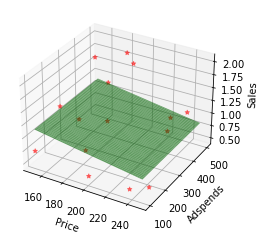

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['Price'],df1['Adspends'],df1['Sales'],c='red', marker='*', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedy.reshape(x_surf.shape), color='g', alpha=0.6)
ax.set_xlabel('Price')
ax.set_ylabel('Adspends')
ax.set_zlabel('Sales')
plt.show()